In [5]:
import pandas as pd

df = pd.read_excel("ECO334/rfas.xlsx")

In [6]:
df.head()

,year,radiofam,stations,family
0,1922,60000,30,25524141
1,1923,1000000,556,26071748
2,1924,2500000,530,25524141
3,1925,3500000,571,27166963
4,1926,5000000,528,27714570


In [8]:
radiofam = df['radiofam']
family = df['family']
df['radio_percentage'] = radiofam / family * 100

In [10]:
df.describe()

,year,radiofam,stations,family,radio_percentage
count,19.000000,1.900000e+01,19.000000,1.900000e+01,19.000000
mean,1931.000000,1.470590e+07,605.105263,3.026989e+07,45.815577
std,5.627314,1.025516e+07,159.399531,3.027581e+06,29.581551
min,1922.000000,6.000000e+04,30.000000,2.552414e+07,0.235072
25%,1926.500000,5.750000e+06,581.000000,2.798837e+07,20.519994
50%,1931.000000,1.400000e+07,612.000000,3.040940e+07,46.038396
75%,1935.500000,2.373450e+07,681.000000,3.267920e+07,72.612652
max,1940.000000,2.930000e+07,814.000000,3.494900e+07,83.836447


## Question 1a
The mean and standard deviation of this new variable are 45.82 and 29.58 respectively.
## Question 1b

Text(0, 0.5, 'Percentage of Families')

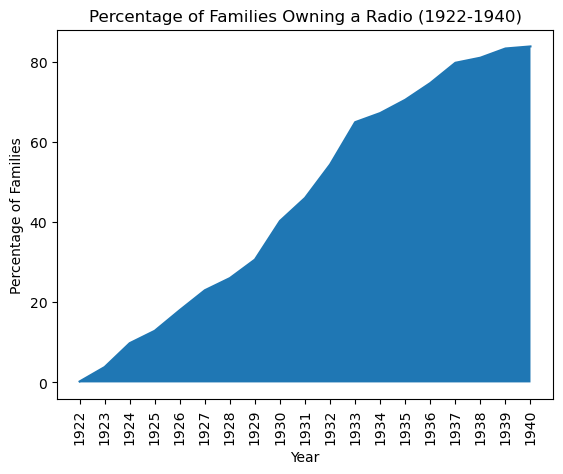

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

plt.fill_between(df['year'], df['radio_percentage'])
plt.plot(df['year'], df['radio_percentage'])
plt.title('Percentage of Families Owning a Radio (1922-1940)')
plt.xlabel('Year')
plt.xticks(range(1922, 1941, 1), rotation = 90)
plt.ylabel('Percentage of Families')

In [18]:
import statsmodels.api as sm

X = df['stations']
y = df['radio_percentage']
X1 = sm.add_constant(X)
model = sm.OLS(y, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       radio_percentage   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     9.582
Date:                Fri, 02 Feb 2024   Prob (F-statistic):            0.00657
Time:                        22:18:06   Log-Likelihood:                -86.556
No. Observations:                  19   AIC:                             177.1
Df Residuals:                      17   BIC:                             179.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.6051     22.485     -0.961      0.3

/Users/jaeseung/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Question 1c
The regression coefficient tells us that for every new radio system the percentage of homes with radio increases by 0.11 percentage points. The p value of 0.007 for the coefficient is below 0.05 indicating that it is statistically significant.

## Question 2a

In [60]:
df2 = pd.read_stata("ECO334/gpa.dta")
df2.head()

,state,region,female,age,black,occ,voted_roosevelt,listen_coughlin,year
0,California,West,1,28,0,Other,1.0,1.0,1938
1,West Virginia,Northeast,0,29,0,Other,0.0,1.0,1938
2,Illinois,Midwest,0,27,0,White Collar,0.0,0.0,1938
3,Ohio,Midwest,0,27,0,Professional,0.0,0.0,1938
4,Indiana,Midwest,0,21,0,Other,0.0,0.0,1938


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   state            3174 non-null   category
 1   region           3174 non-null   category
 2   female           3174 non-null   int8    
 3   age              3174 non-null   int8    
 4   black            3174 non-null   int8    
 5   occ              3174 non-null   category
 6   voted_roosevelt  3114 non-null   float32 
 7   listen_coughlin  3053 non-null   float32 
 8   year             3174 non-null   int16   
dtypes: category(3), float32(2), int16(1), int8(3)
memory usage: 51.5 KB


In [26]:
coughlin_listeners_share = df2['listen_coughlin'].mean()
coughlin_listeners_share = round(coughlin_listeners_share * 100, 2)
print(f"The share of regular Coughlin listeners before the 1936 election is {coughlin_listeners_share}%")

The share of regular Coughlin listeners before the 1936 election is 30.04%


## Question 2b

The share of respondents in the Northeast that regularly listened to Coughlin is 36.36%


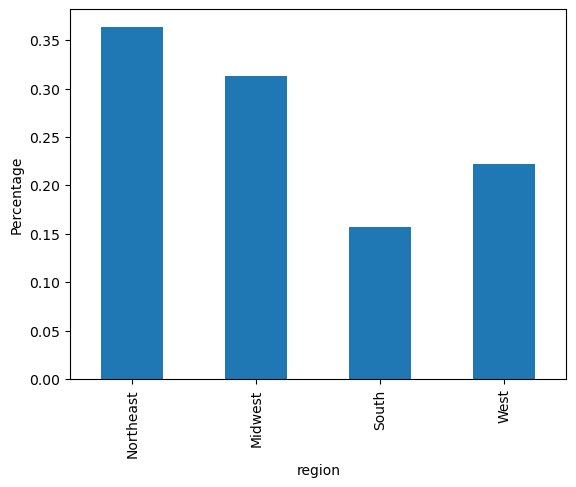

In [31]:
region_coughlin_share = df2.groupby('region')['listen_coughlin'].mean()
region_coughlin_share.plot(kind='bar')
plt.ylabel('Percentage')
northeast_coughlin_share = df2[df2['region'] == 'Northeast']['listen_coughlin'].mean()
northeast_coughlin_share = round(northeast_coughlin_share * 100, 2)
print(f"The share of respondents in the Northeast that regularly listened to Coughlin is {northeast_coughlin_share}%")

## Question 2c

In [33]:
roosevelt_voters_share = df2['voted_roosevelt'].mean()
roosevelt_voters_share = round(roosevelt_voters_share * 100, 2)
print(f"The share of respondents that voted for Roosevelt in the 1936 election is {roosevelt_voters_share}%")

The share of respondents that voted for Roosevelt in the 1936 election is 51.0%


## Question 2d

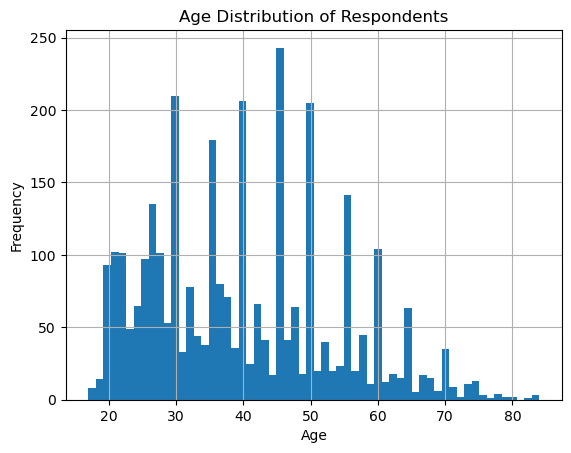

In [36]:
df2['age'].hist(bins=60)
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [67]:
df2.isna().sum()

state                0
region               0
female               0
age                  0
black                0
occ                  0
voted_roosevelt      0
listen_coughlin    114
year                 0
dtype: int64

In [66]:
df2.dropna(subset = ['voted_roosevelt'], inplace=True)

In [68]:
X = df2[['female', 'black', 'age']]
y = df2['voted_roosevelt']
X1 = sm.add_constant(X)
model = sm.OLS(y, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        voted_roosevelt   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     21.81
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           5.64e-14
Time:                        23:40:05   Log-Likelihood:                -2227.1
No. Observations:                3114   AIC:                             4462.
Df Residuals:                    3110   BIC:                             4486.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3471      0.029     11.989      0.0

## Question 2e
The female variable coefficient indicates that being female is associated with a 0.0626 unit decrease in voting for Roosevelt. 

The age variable coefficient indicates that for every year of age there is a .0046 unit increase in voting for Roosevelt.

The black variable coefficient indicates that being black is associated with a 0.0411 unit decrease in voting for Roosevelt.